## 02 Logistic Regression from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

%matplotlib inline

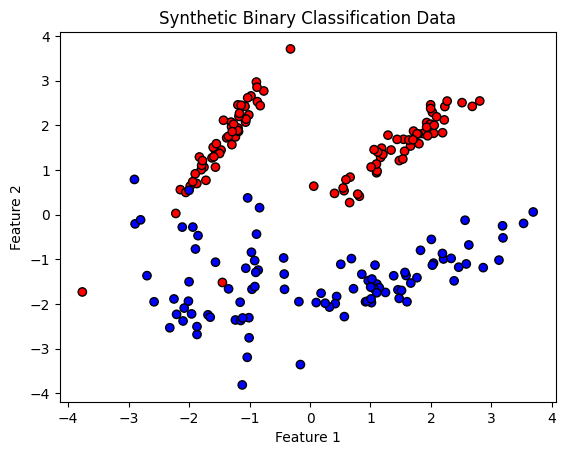

In [2]:
# Generate synthetic 2D dataset
X, y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    class_sep = 1.5,
    random_state = 4
)

# Visualise
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'bwr', edgecolors = 'k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Binary Classification Data")

plt.show()

### Implement Sigmoid

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict_proba(X, w):
    """
    X: (m, n+1) with Bias Column,
    W: (n+1, ),
    returns: probabilities h_w(x)
    """
    z = X.dot(w)
    return sigmoid(z)

In [4]:
m, n = X.shape
X_bias = np.c_[np.ones((m,1)), X] #Shape (m, 3)
w = np.zeros(X_bias.shape[1])

In [5]:
def compute_cost(X, y, w):
    h = predict_proba(X, w)
    eps = 1e-15
    cost = -(1/m) * np.sum(y * np.log(h + eps) + (1-y) * np.log(1-h + eps))
    return cost

In [6]:
def compute_Gradient(X, y, w):
    h = predict_proba(X, w)
    grad = (1/m) * X.T.dot(h-y)
    return grad

In [7]:
print("Initial Cost: ", compute_Gradient(X_bias, y, w))

Initial Cost:  [-0.01        0.01836093 -0.75704514]


In [8]:
# Geradient desecnt Loop
a = 0.01
iter = 1000
cost_hstry = []

for _ in range(iter):
    grad = compute_Gradient(X_bias, y, w)
    w -= a * grad
    cost = compute_cost(X_bias, y, w)
    cost_hstry.append(cost)

print("Final cost: ", cost_hstry[-1])
print("Final W: ", w)

Final cost:  0.15599729113681166
Final W:  [-0.05061836 -0.14786458  1.7789486 ]


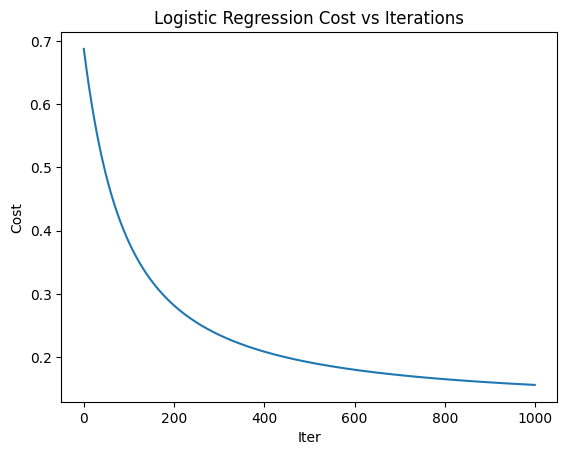

In [9]:
plt.plot(cost_hstry)
plt.xlabel("Iter")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost vs Iterations")
plt.show()

In [12]:
def predict_classes(X, w, threshold = 0.5):
    prob = predict_proba(X_bias, w)
    return (prob >= threshold).astype(int)
    

y_pred = predict_classes(X, w)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))

Accuracy: 0.96
Precision: 0.9433962264150944
Recall: 0.9803921568627451
F1: 0.9615384615384616


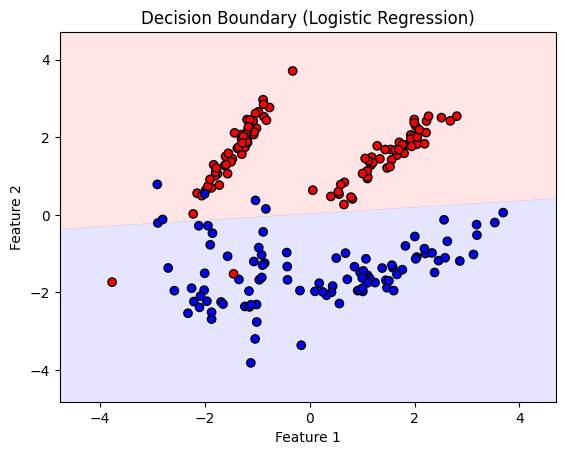

In [18]:
def plot_decision_boundary(X, y, w):
    # X without bias; shape (m, 2)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]  # add bias
    probs = predict_proba(grid, w).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary (Logistic Regression)")
    plt.show()

plot_decision_boundary(X, y, w)


Sklearn Accuracy: 0.97


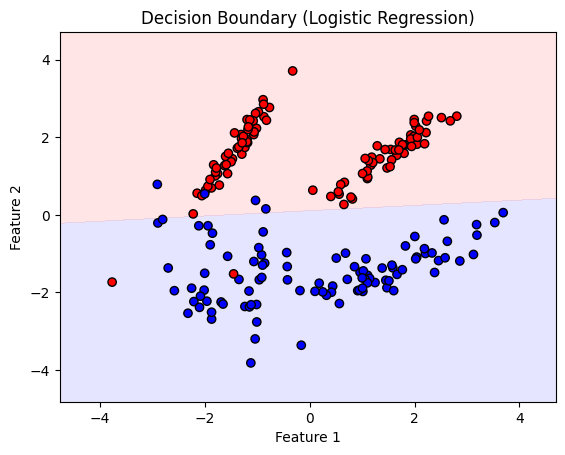

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

y_pred_sklearn = log_reg.predict(X)

print("Sklearn Accuracy:", accuracy_score(y, y_pred_sklearn))

# Optional: plot sklearn decision boundary too
theta_sklearn = np.r_[log_reg.intercept_[0], log_reg.coef_[0]]  # [b, w1, w2]
plot_decision_boundary(X, y, theta_sklearn)
